In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
MCL=pd.read_csv('MicroCreditLoan.csv')

In [3]:
MCL

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [4]:
MCL['label'].unique()

array([0, 1], dtype=int64)

Label is our target column

In [5]:
MCL['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

1 : Non defaulters
0 :Defaulters    

In [6]:
MCL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There are 21 :float , 13 :integer and 3 object columns

In [7]:
MCL.shape

(209593, 37)

There are 209593 : ROWS and 37: COLUMNS in MCL dataset.

In [8]:
MCL.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

List of columns in dataset

In [9]:
MCL.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...    cnt_loans30   amnt_loans30  \
count      209593.000000     209593.000000  ...  209593.000000  209593.000000   
mean         3712.202921       2064.452797  ...       2.758981      17.952021   
std         53374.833430       2370.786034  ...       2.554502      17.379741   
min           -29.000000          0.000000  ...       0.000000       0.000000   
25%             0.000000        770.000000  ...       1.000000       6.000000   
50%             0.000000       1539.000000  ...       2.000000      12.000000   
75%             0.000000       2309.000000  ...       4.000000      24.000000   
max        999171.809410      55000.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 34 columns]

There is huge difference between 75% and max in all listed columns above,  This makes clear that there are outliers present in the dataset.    

In [10]:
MCL.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null variables in the dataset.

### Correlation

In [11]:
MCL.corr()

Unnamed: 0     label       aon  daily_decr30  \
Unnamed: 0              1.000000  0.000403 -0.002048      0.002739   
label                   0.000403  1.000000 -0.003785      0.168298   
aon                    -0.002048 -0.003785  1.000000      0.001104   
daily_decr30            0.002739  0.168298  0.001104      1.000000   
daily_decr90            0.003077  0.166150  0.000374      0.977704   
rental30               -0.003906  0.058085 -0.000960      0.442066   
rental90               -0.003459  0.075521 -0.000790      0.458977   
last_rech_date_ma      -0.001853  0.003728  0.001692      0.000487   
last_rech_date_da      -0.001133  0.001711 -0.001693     -0.001636   
last_rech_amt_ma       -0.001064  0.131804  0.004256      0.275837   
cnt_ma_rech30           0.003320  0.237331 -0.003148      0.451385   
fr_ma_rech30            0.003181  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30       0.000123  0.202828  0.000707      0.636536   
medianamnt_ma_rech30   -0.001371  0.141490  0.004306      0.295356   
medianmarechprebal30    0.001258 -0.004829  0.003930     -0.001153   
cnt_ma_rech90           0.002329  0.236392 -0.002725      0.587338   
fr_ma_rech90           -0.000249  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90       0.000523  0.205793  0.001011      0.762981   
medianamnt_ma_rech90   -0.000298  0.120855  0.004909      0.257847   
medianmarechprebal90   -0.001947  0.039300 -0.000859      0.037495   
cnt_da_rech30           0.000888  0.003827  0.001564      0.000700   
fr_da_rech30           -0.002504 -0.000027  0.000892     -0.001499   
cnt_da_rech90          -0.001324  0.002999  0.001121      0.038814   
fr_da_rech90           -0.002827 -0.005418  0.005395      0.020673   
cnt_loans30             0.001725  0.196283 -0.001826      0.366116   
amnt_loans30            0.002387  0.197272 -0.001726      0.471492   
maxamnt_loans30         0.000698  0.000248 -0.002764     -0.000028   
medianamnt_loans30     -0.002005  0.044589  0.004664     -0.011610   
cnt_loans90             0.002241  0.004733 -0.000611      0.008962   
amnt_loans90            0.000781  0.199788 -0.002319      0.563496   
maxamnt_loans90         0.001742  0.084144 -0.001191      0.400199   
medianamnt_loans90     -0.002615  0.035747  0.002771     -0.037305   
payback30              -0.000040  0.048336  0.001940      0.026915   
payback90               0.002411  0.049183  0.002203      0.047175   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
Unnamed: 0                0.003077 -0.003906 -0.003459          -0.001853   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.360601           0.002243   
medianamnt_ma_rech90      0.250518  0.110356  0.103151          -0.000726   
medianmarechprebal90      0.036

Most columns are positively correlated with label

### Top 10 correlated values

In [94]:
correlation_0=MCL.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_0

maxamnt_loans30       cnt_loans30             0.000053
cnt_loans30           maxamnt_loans30         0.000053
cnt_loans90           maxamnt_loans30         0.000087
maxamnt_loans30       cnt_loans90             0.000087
payback90             maxamnt_loans30         0.000194
                                                ...   
cnt_loans90           cnt_loans90             1.000000
amnt_loans90          amnt_loans90            1.000000
maxamnt_loans90       maxamnt_loans90         1.000000
medianmarechprebal30  medianmarechprebal30    1.000000
payback90             payback90               1.000000
Length: 841, dtype: float64

In [95]:
correlation_0=correlation_0[correlation_0!=1]
correlation_0

maxamnt_loans30  cnt_loans30        0.000053
cnt_loans30      maxamnt_loans30    0.000053
cnt_loans90      maxamnt_loans30    0.000087
maxamnt_loans30  cnt_loans90        0.000087
payback90        maxamnt_loans30    0.000194
                                      ...   
amnt_loans90     cnt_loans90        0.965234
amnt_loans30     cnt_loans30        0.971093
cnt_loans30      amnt_loans30       0.971093
daily_decr90     daily_decr30       0.985799
daily_decr30     daily_decr90       0.985799
Length: 812, dtype: float64

In [97]:
correlation_0_Top10=correlation_0.tail(10)
correlation_0_Top10

medianamnt_loans90  medianamnt_loans30    0.911604
medianamnt_loans30  medianamnt_loans90    0.911604
rental30            rental90              0.961295
rental90            rental30              0.961295
cnt_loans90         amnt_loans90          0.965234
amnt_loans90        cnt_loans90           0.965234
amnt_loans30        cnt_loans30           0.971093
cnt_loans30         amnt_loans30          0.971093
daily_decr90        daily_decr30          0.985799
daily_decr30        daily_decr90          0.985799
dtype: float64

#### Correlation Heat Map

<AxesSubplot:>

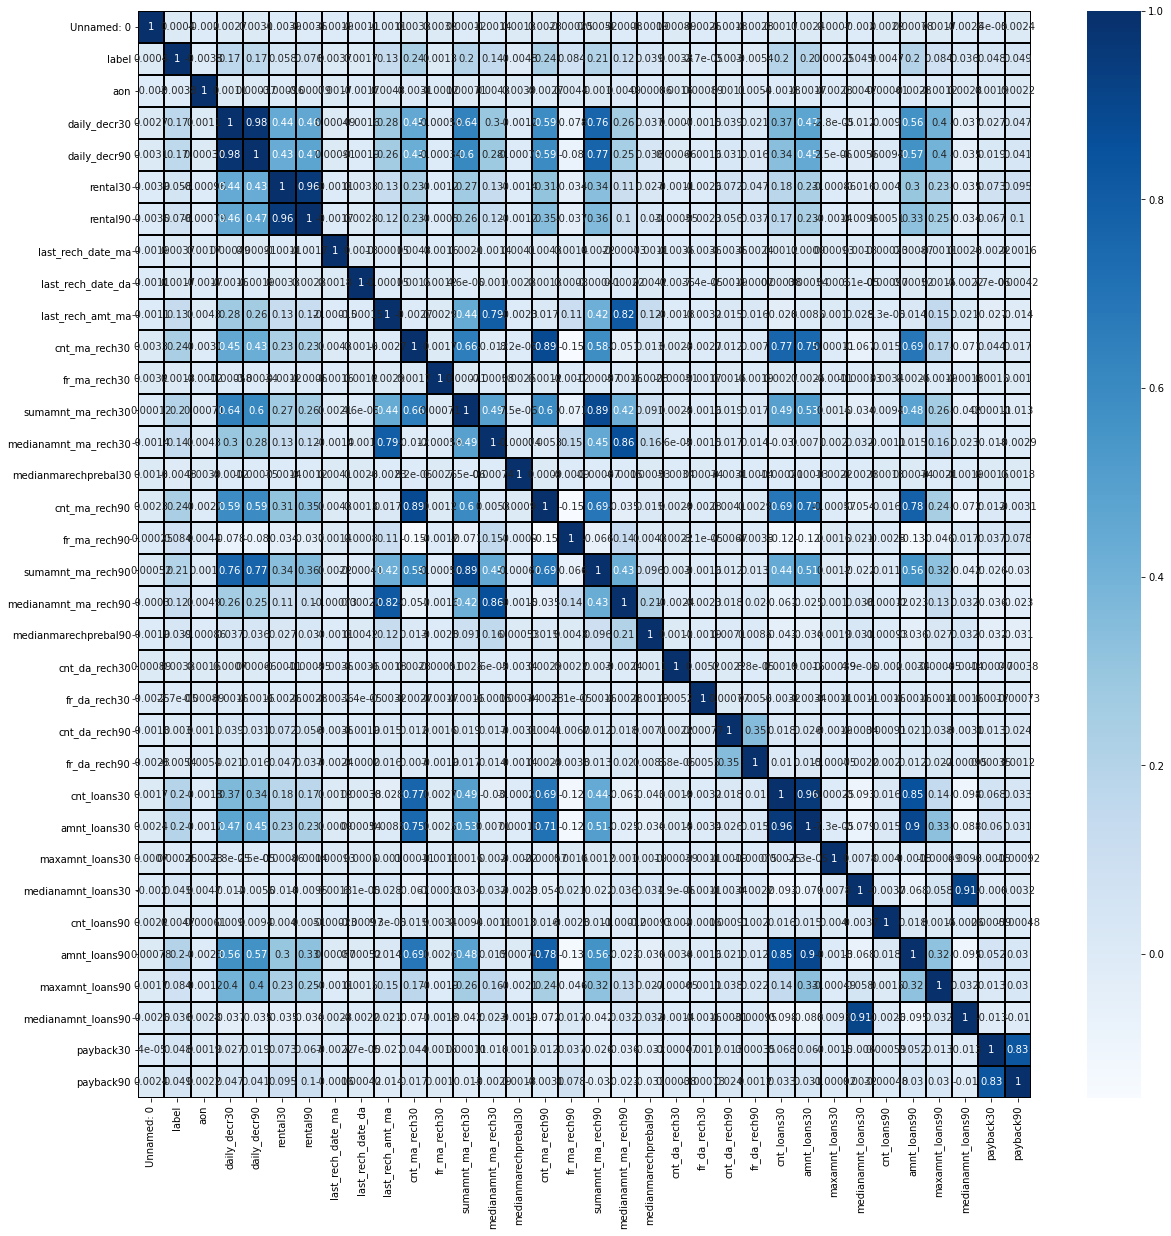

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(MCL.corr(),annot=True,cmap='Blues',linewidth=1,linecolor='Black')

Graphical representaion od correlation with label column

### EDA

##### Univariative Analysis

<AxesSubplot:xlabel='label'>

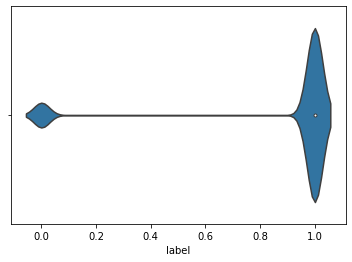

In [13]:
sns.violinplot(MCL['label'])

THis plot makes clear that there are more non defaulters.

In [14]:
MCL.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

<AxesSubplot:xlabel='cnt_loans30'>

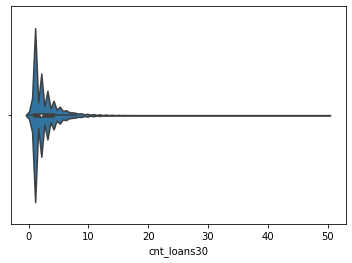

In [15]:
sns.violinplot(MCL['cnt_loans30'])

Form above plot it is clear that most users have taken loan around 10 times in last 30 days.

<AxesSubplot:xlabel='fr_da_rech30'>

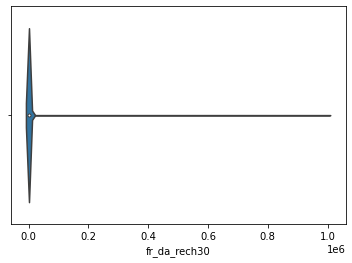

In [16]:
sns.violinplot(MCL['fr_da_rech30'])

Frquency of data account getting recharged is less in past 30 days.

<AxesSubplot:xlabel='cnt_ma_rech90'>

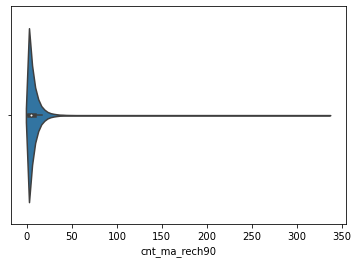

In [17]:
sns.violinplot(MCL['cnt_ma_rech90'])

Mostly atleast 50 times main account got recharged in past 90 days.

<AxesSubplot:xlabel='cnt_loans30'>

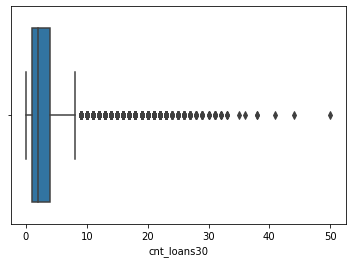

In [18]:
sns.boxplot(MCL['cnt_loans30'])

Number of loans taken by user in last 30 days is maximum 50 times and mostly aprrox 5 times

<AxesSubplot:xlabel='payback30'>

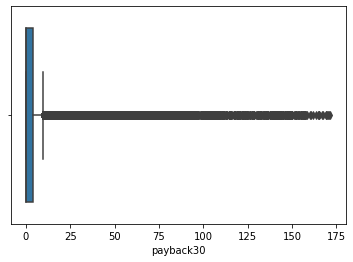

In [19]:
sns.boxplot(MCL['payback30'])

Average payback time is mostly within 10days and max upto 175 days in days over last 30 days 

<AxesSubplot:xlabel='payback90'>

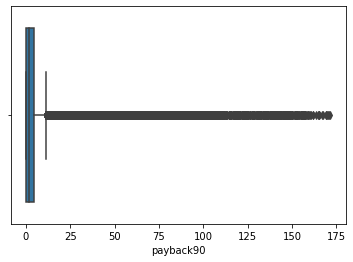

In [20]:
sns.boxplot(MCL['payback90'])

Average payback time is mostly within 12days and max upto 175 days in days over last 90 days 

<AxesSubplot:xlabel='maxamnt_loans30'>

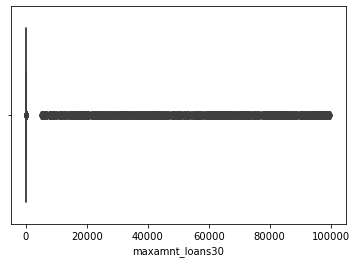

In [21]:
sns.boxplot(MCL['maxamnt_loans30'])

In [22]:
MCL['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

There are only two options of loan Rs 6 and Rs 12 , but we can see that there are outliers present after using value_counts.

<AxesSubplot:xlabel='maxamnt_loans30', ylabel='Density'>

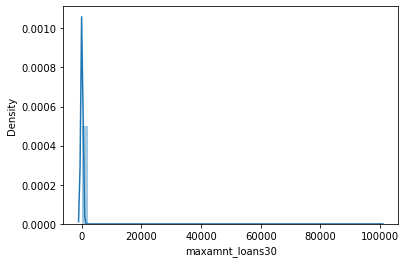

In [23]:
sns.distplot(MCL['maxamnt_loans30'])

Cheking the distribution plot for max amount of loan given to user end.

##### Bivariative Analysis

Text(0.5, 1.0, 'Stripplot')

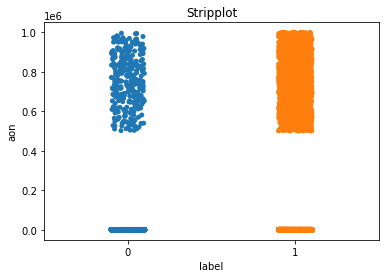

In [24]:
sns.stripplot(x='label',y='aon',data=MCL)
plt.title('Stripplot')

From above it is clear that there are less defaulters.

Text(0.5, 1.0, 'Stripplot')

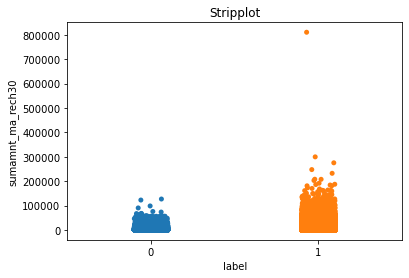

In [25]:
sns.stripplot(x='label',y='sumamnt_ma_rech30',data=MCL)
plt.title('Stripplot')

It is justifiable that non defulaters have recharged mostly with the hihger amount.One mobile number has recharged for Rs 800000 .

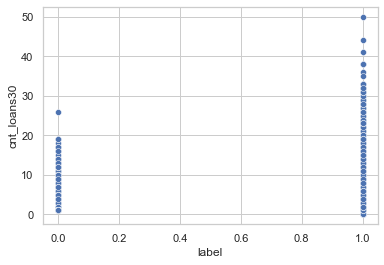

In [26]:
sns.set(style='whitegrid')
sns.scatterplot(x='label',y='cnt_loans30',data=MCL)
plt.show()

Above graph makes clear that non defaulters have taken loan more frequently .

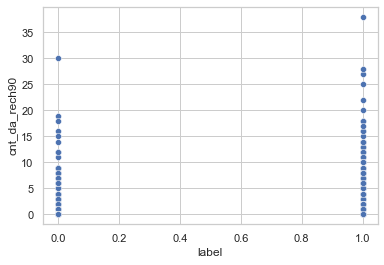

In [27]:
sns.scatterplot(x='label',y='cnt_da_rech90',data=MCL)
plt.show()

Number of times the data account got recharged is almost same in defaulters and non defaulters.

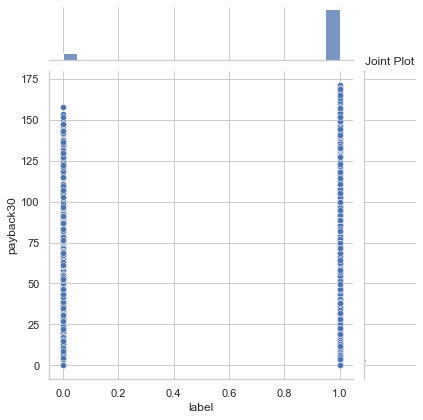

In [28]:
sns.jointplot(x='label',y='payback30',data=MCL)
plt.title('Joint Plot')
plt.show()

Payback period for both the defaulters and non defultes is almost same for last 30 days.

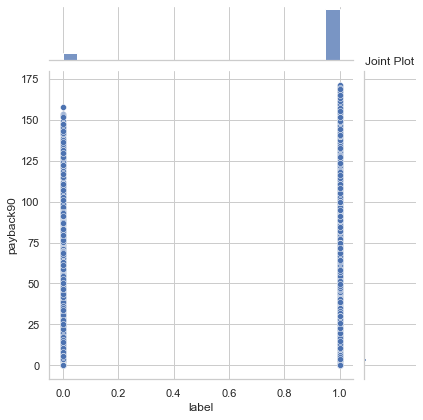

In [29]:
sns.jointplot(x='label',y='payback90',data=MCL)
plt.title('Joint Plot')
plt.show()

Payback period for both the defaulters and non defultes is almost same for last 90 days.

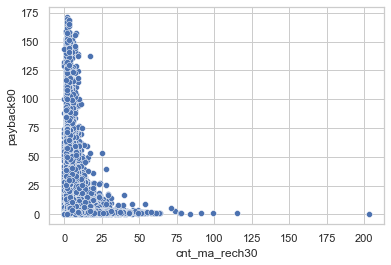

In [30]:
sns.scatterplot(x='cnt_ma_rech30',y='payback90',data=MCL)
plt.show()

Lesser the Number of times main account got recharged in last 30 days higher is average payback time in days over last 90 days


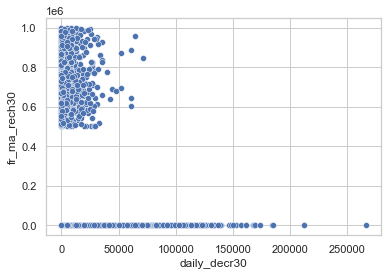

In [31]:
sns.scatterplot(x='daily_decr30',y='fr_ma_rech30',data=MCL)
plt.show()

daily_decr30---->Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)


fr_ma_rech30---->Frequency of main account recharged in last 30 days


##### Multivariative Analysis

In [32]:
ncols,nrows = (12,3)
CN=['Unnamed: 0', 'label', 'aon', 'daily_decr30',
       'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90']
CN

['Unnamed: 0',
 'label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

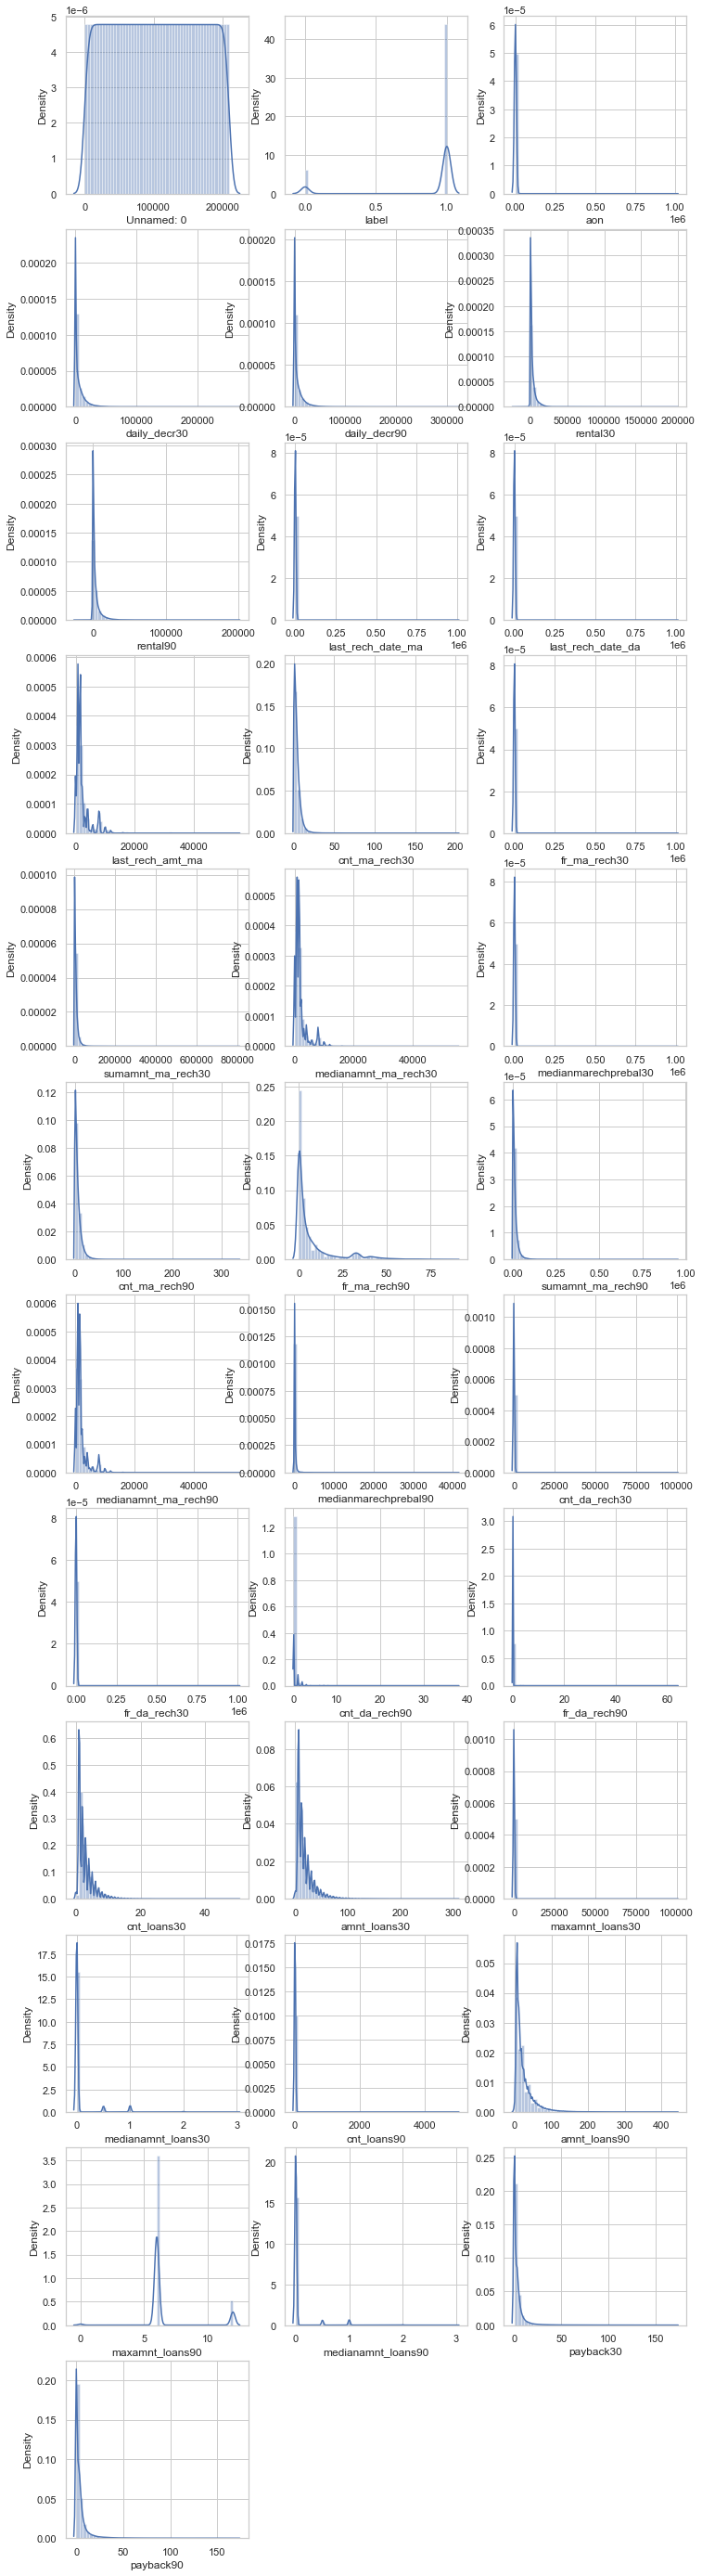

In [33]:
plt.figure(figsize=(12,50))
for index,col in enumerate(CN):
    plt.subplot(ncols,nrows,index+1)
    sns.distplot(MCL[CN[index]])

From above distribution plot we can figure there is skewness in almost each variable.

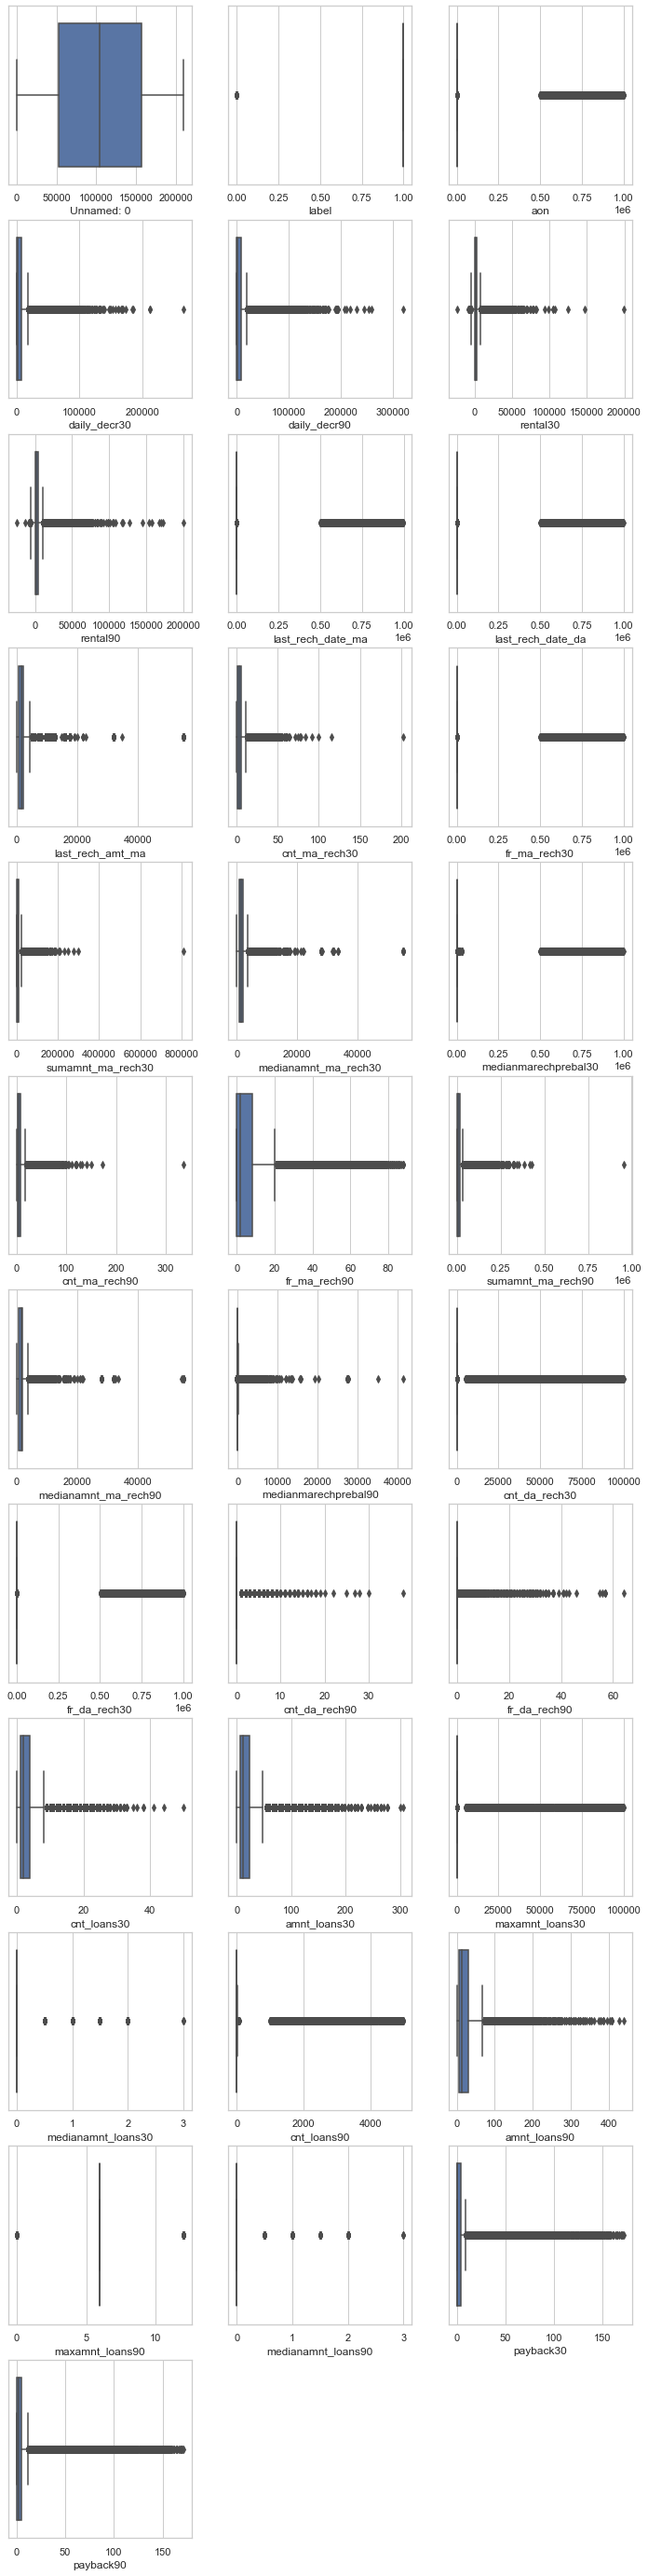

In [34]:
plt.figure(figsize=(12,50))
for index,col in enumerate(CN):
    plt.subplot(ncols,nrows,index+1)
    sns.boxplot(MCL[CN[index]])

Almost all variacbles have outliers which need to be cleared.

In [35]:
MCL=pd.read_csv('MicroCreditLoan.csv')

In [36]:
MCL.drop('last_rech_date_da',axis=1,inplace=True)

Have droped the column Number of days till last recharge of data account as most data has 0 value.

In [37]:
MCL.daily_decr30[MCL.daily_decr30<0]=0
MCL.aon[MCL.aon<0]=0
MCL.daily_decr90[MCL.daily_decr90<0]=0
MCL.rental30[MCL.rental30<0]=0
MCL.rental90[MCL.rental90<0]=0
MCL.last_rech_date_ma[MCL.last_rech_date_ma<0]=0

All negatuve values in the columns are replaced.

In [38]:
MCL.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.576081    5381.416791   
std     60504.431823       0.330519   75696.057541    9220.614929   
min         1.000000       0.000000       0.000000       0.000000   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.529604    2703.979234    3496.451841        3755.986822   
std     10918.804663    4299.241981    5760.545289       53905.882512   
min         0.000000       0.000000       0.000000           0.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

All the negative values in column decr30 are treated with 0

In [39]:
CT=[ 'aon', 'daily_decr30',
       'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma',
        'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'cnt_loans90',
       'amnt_loans90',
       'payback30', 'payback90']

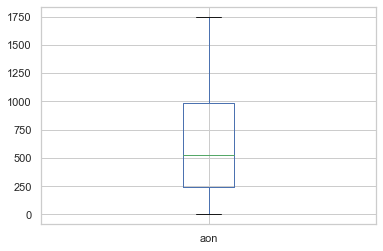

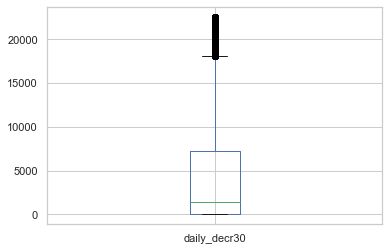

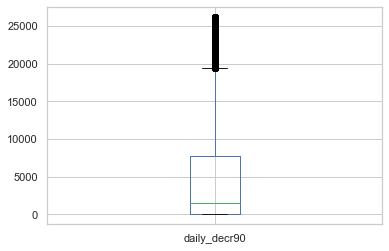

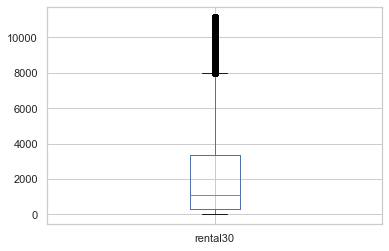

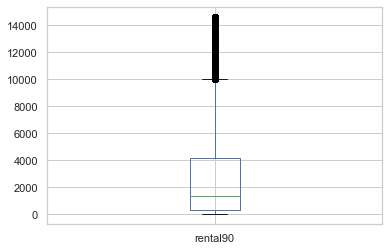

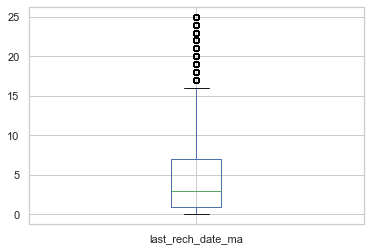

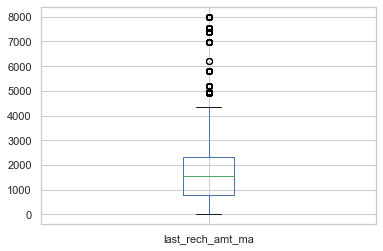

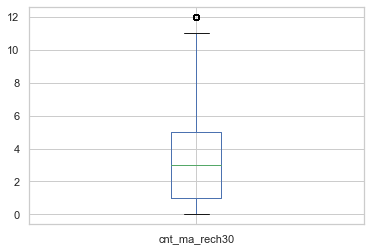

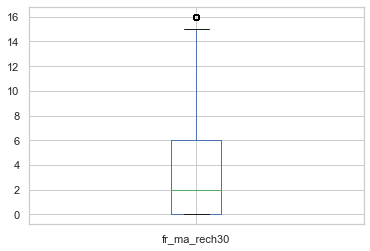

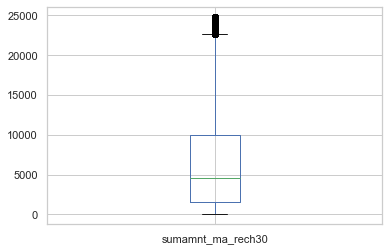

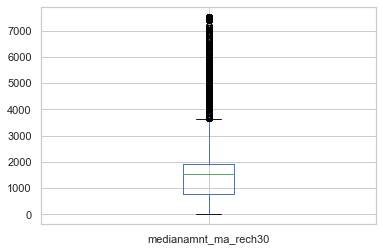

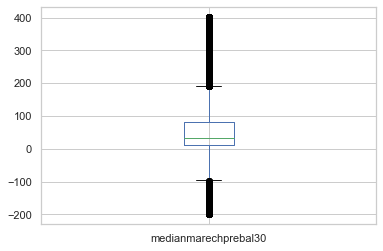

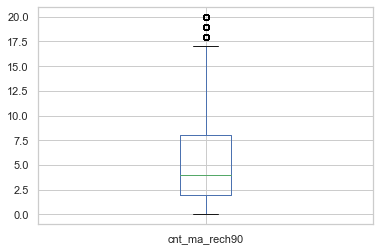

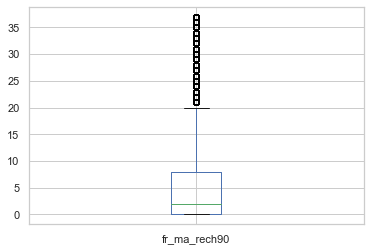

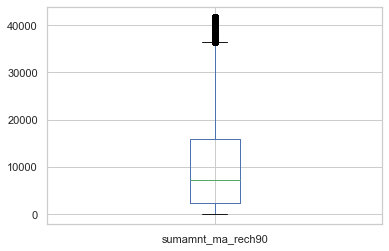

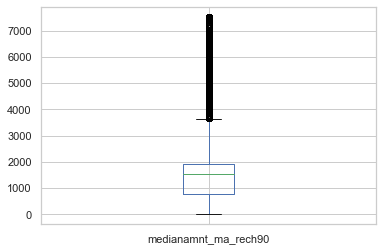

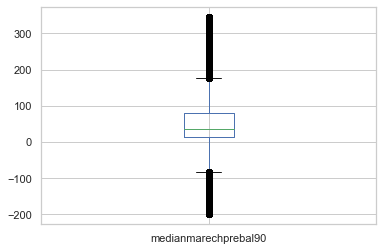

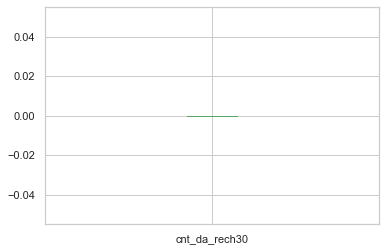

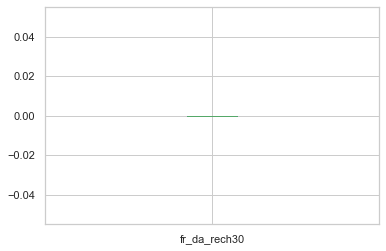

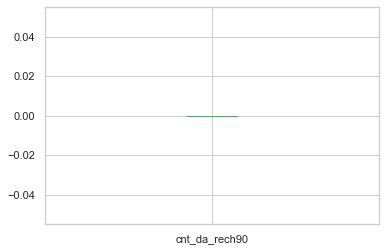

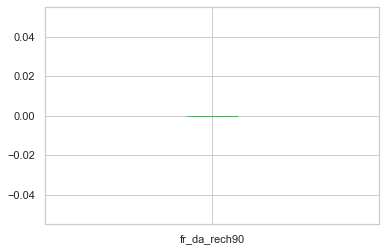

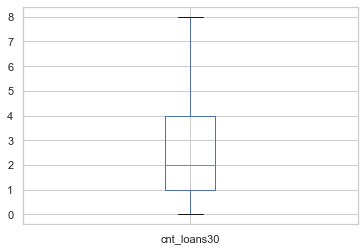

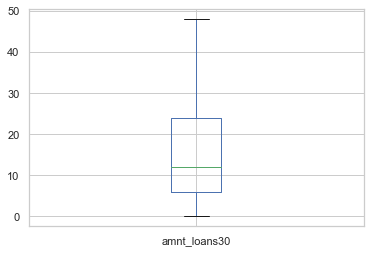

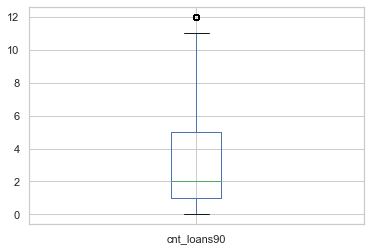

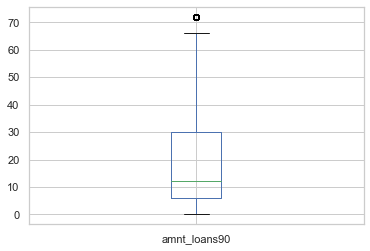

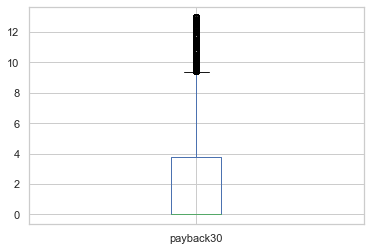

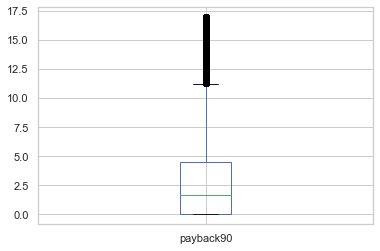

In [40]:
for i in CT:
    
    q4=MCL[i].quantile(.95)
    MCL[i][MCL[i]>q4]=q4
    MCL[i].plot.box()
    plt.show()

Outlier are removed by hard caping method for relevant columns.

In [41]:
MCL.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177     658.058642    4751.929026   
std     60504.431823       0.330519     487.952357    6568.838079   
min         1.000000       0.000000       0.000000       0.000000   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000    1749.000000   22577.500000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     5306.730380    2422.447034    3097.525542           5.504769   
std      7563.608869    3081.524026    4033.738897           6.576176   
min         0.000000       0.000000       0.000000           0.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max     26244.258000   11166.420000   14642.974000          25.000000   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        1997.011675       3.736966  ...       2.623208      16.713135   
std         2053.751014       3.327671  ...       2.038314      12.864497   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max         8000.000000      12.000000  ...       8.000000      48.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029       3.503967      21.783733   
std        4245.264648            0.218039       3.167647      19.407649   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000      12.000000      72.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       2.525288       3.271388  
std           2.103864            0.200692       3.616676       4.619178  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000      13.000000      17.000000  

[8 rows x 33 columns]

DATA SET IS READY WITH LESSER OUTLIERS

In [42]:
MCL.shape

(209593, 36)

### DATA SPLITING

In [43]:
x=MCL.drop('label',axis=1)
y=MCL.iloc[:,1:2]

In [44]:
x

Unnamed: 0       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0                1  21408I70789   272.0   3055.050000   3065.150000    220.13   
1                2  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2                3  17943I70372   535.0   1398.000000   1398.000000    900.13   
3                4  55773I70781   241.0     21.228000     21.228000    159.42   
4                5  03813I82730   947.0    150.619333    150.619333   1098.90   
...            ...          ...     ...           ...           ...       ...   
209588      209589  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      209590  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      209591  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      209592  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      209593  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  ...  \
0         260.13                2.0              1539              2  ...   
1        3691.26               20.0              5787              1  ...   
2         900.13                3.0              1539              1  ...   
3         159.42               25.0               947              0  ...   
4        1098.90                4.0              2309              7  ...   
...          ...                ...               ...            ...  ...   
209588   1089.19                1.0              4048              3  ...   
209589   1728.36                4.0               773              4  ...   
209590   8893.20                3.0              1539              5  ...   
209591    984.58                2.0               773              5  ...   
209592    631.20               13.0              7526              2  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  13.000000  17.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 35 columns]

In [45]:
x.drop('Unnamed: 0',axis=1,inplace=True)

We have droped the column Unnamed as this is just giving us the count of rows.

In [46]:
x.drop('msisdn',axis=1,inplace=True)

we ahve droped the cilumn msisdn as this is giving only the info of mobile numbers

In [47]:
x.drop('pcircle',axis=1,inplace=True)

We have droped the column as pcircle gives the network company name.

In [48]:
x.drop('pdate',axis=1,inplace=True)

we gave droped the column pdate as it gives the date of joining the network.

In [49]:
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                     2.0              1539              2          16.0   
1                    20.0              5787              1           0.0   
2                     3.0              1539              1           0.0   
3                    25.0               947              0           0.0   
4                     4.0              2309              7           2.0   
...                   ...               ...            ...           ...   
209588                1.0              4048              3           2.0   
209589                4.0               773              4           1.0   
209590                3.0              1539              5           8.0   
209591                2.0               773              5           4.0   
209592               13.0              7526              2           1.0   

        sumamnt_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0                  3078.0  ...            2            12              6.0   
1                  5787.0  ...            1            12             12.0   
2                  1539.0  ...            1             6              6.0   
3                     0.0  ...            2            12              6.0   
4                 20029.0  ...            7            42              6.0   
...                   ...  ...          ...           ...              ...   
209588            10404.0  ...            2            12              6.0   
209589             3092.0  ...            3            18              6.0   
209590             9334.0  ...            4            42             12.0   
209591            12154.0  ...            2            18             12.0   
209592             9065.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0  13.000000  17.000000  
1                      0.0   0.000000   0.000000  
2                      0.0   0.000000   0.000000  
3                      0.0   0.000000   0.000000  
4                      0.0   2.333333   2.333333  
...                    ...        ...        ...  
209588                 0.0   1.000000   1.000000  
209589                 0.0   1.000000   1.000000  
209590              

x data after clearing all the unwanted columns.

In [50]:
y

label
0           0
1           1
2           1
3           1
4           1
...       ...
209588      1
209589      1
209590      1
209591      1
209592      1

[209593 rows x 1 columns]

In [51]:
y.value_counts()

label
1        183431
0         26162
dtype: int64

we can see that target is imbalanced, hence will perform data balancing first with oversampling method

### Checking Imabalancing

In [52]:
import imblearn

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [55]:
y_over.value_counts()

label
1        183431
0        183431
dtype: int64

we can see that oversampling is succesfully applied for the target.

In [56]:
x_over.shape

(366862, 31)

In [57]:
y_over

label
0           0
1           1
2           1
3           1
4           1
...       ...
366857      0
366858      0
366859      0
366860      0
366861      0

[366862 rows x 1 columns]

Can be confirmed that oversampling is succesfully applied to avoid imbalance.

#### Skewness

In [58]:
x_over.describe()

aon   daily_decr30   daily_decr90       rental30  \
count  366862.000000  366862.000000  366862.000000  366862.000000   
mean      611.185768    3240.092883    3563.890312    2170.043856   
std       475.169938    5560.424234    6338.384831    2968.645722   
min         0.000000       0.000000       0.000000       0.000000   
25%       218.000000      12.709131      12.952410     169.625191   
50%       471.374951     523.552000     530.268904     870.225000   
75%       902.000000    3820.234584    3930.980000    2860.577770   
max      1749.000000   22577.500000   26244.258000   11166.420000   

            rental90  last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  \
count  366862.000000      366862.000000     366862.000000  366862.000000   
mean     2688.096858           6.006423       1645.453064       2.661881   
std      3797.842968           7.215358       1913.574641       3.026249   
min         0.000000           0.000000          0.000000       0.000000   
25%       183.600000           1.000000        770.000000       0.000000   
50%      1017.300000           3.000000        951.500000       2.000000   
75%      3485.699366           8.062054       1547.000000       4.000000   
max     14642.974000          25.000000       8000.000000      12.000000   

        fr_ma_rech30  sumamnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count  366862.000000      366862.000000  ...  366862.000000  366862.000000   
mean        2.895082        4918.746682  ...       2.049138      13.263641   
std         4.424228        6231.312201  ...       1.757268      11.183391   
min         0.000000           0.000000  ...       0.000000       0.000000   
25%         0.000000           0.000000  ...       1.000000       6.000000   
50%         0.000000        2313.580865  ...       1.000000       6.000000   
75%         4.000000        6957.000000  ...       2.000000      18.000000   
max        16.000000       24837.000000  ...       8.000000      48.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    366862.000000       366862.000000  366862.000000  366862.000000   
mean        272.725022            0.042739       2.692006      16.498501   
std        4253.541720            0.184058       2.718475      16.666004   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       1.377438       9.000000   
75%           6.000000            0.000000       3.000000      18.000000   
max       99864.560864            3.000000      12.000000      72.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    366862.000000       366862.000000  366862.000000  366862.000000  
mean          6.490217            0.037648       1.963449       2.614678  
std           1.724688            0.171177       3.409084       4.408099  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       0.000000  
75%           6.000000            0.000000       2.840399       3.593126  
max          12.000000            3.000000      13.000000      17.000000  

[8 rows x 31 columns]

In [59]:
x_over.skew()

aon                      0.883493
daily_decr30             2.155583
daily_decr90             2.273761
rental30                 1.793765
rental90                 1.888036
last_rech_date_ma        1.471938
last_rech_amt_ma         2.098285
cnt_ma_rech30            1.500088
fr_ma_rech30             1.629762
sumamnt_ma_rech30        1.706876
medianamnt_ma_rech30     2.182067
medianmarechprebal30     2.309777
cnt_ma_rech90            1.691516
fr_ma_rech90             2.009186
sumamnt_ma_rech90        1.868021
medianamnt_ma_rech90     2.143886
medianmarechprebal90     2.107487
cnt_da_rech30            0.000000
fr_da_rech30             0.000000
cnt_da_rech90            0.000000
fr_da_rech90             0.000000
cnt_loans30              1.908909
amnt_loans30             1.747096
maxamnt_loans30         17.863199
medianamnt_loans30       5.100728
cnt_loans90              2.022597
amnt_loans90             1.971537
maxamnt_loans90          2.340276
medianamnt_loans90       5.378146
payback30     

In [60]:
x_Cols=x_over.columns
x_Cols

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90'],
      dtype='object')

In [61]:
x_Cols=x_Cols.drop(['cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90','maxamnt_loans30', 'medianamnt_loans30','maxamnt_loans90', 'medianamnt_loans90'])
x_Cols

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90'],
      dtype='object')

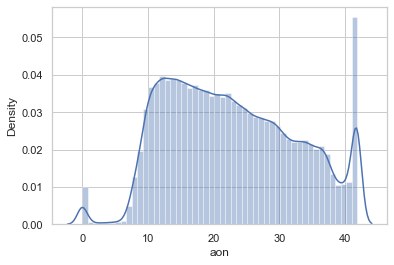

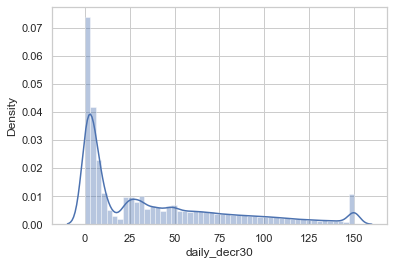

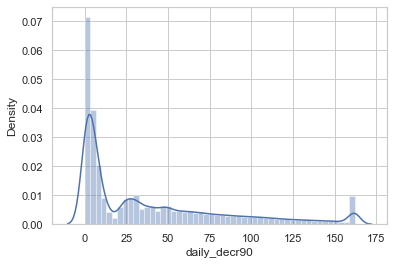

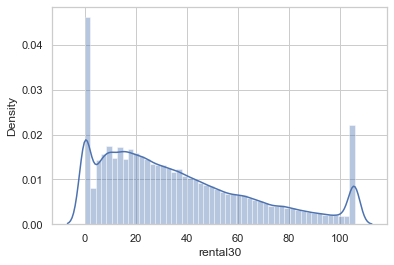

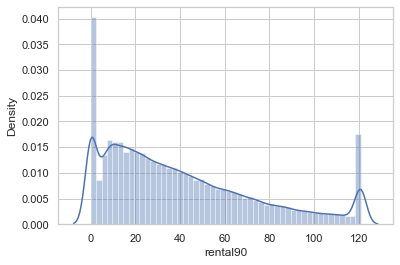

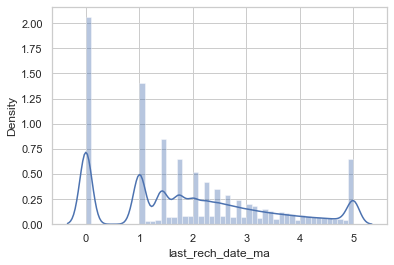

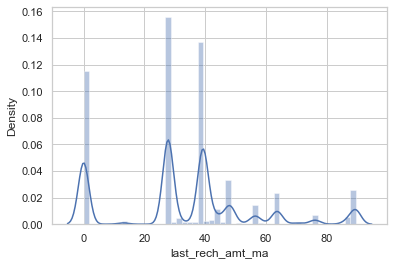

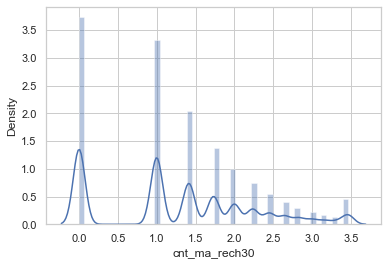

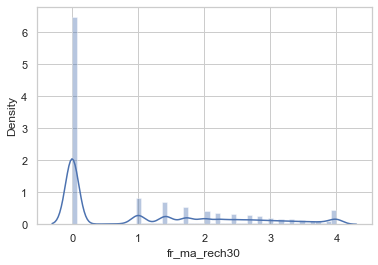

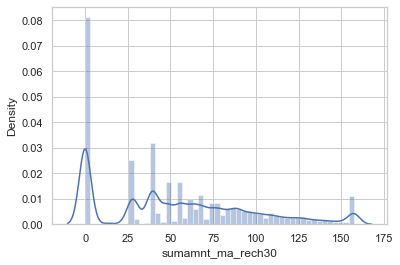

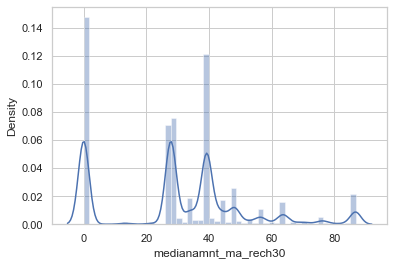

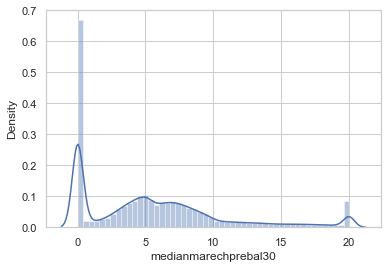

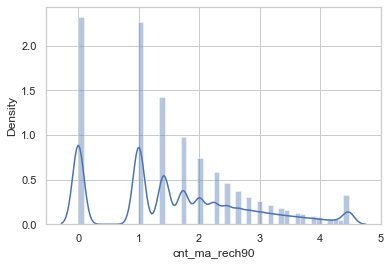

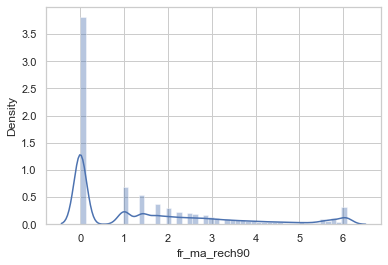

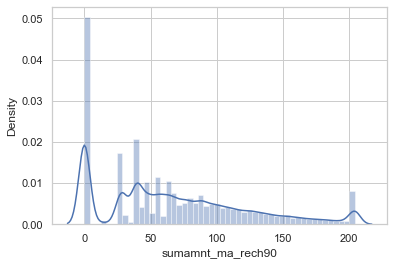

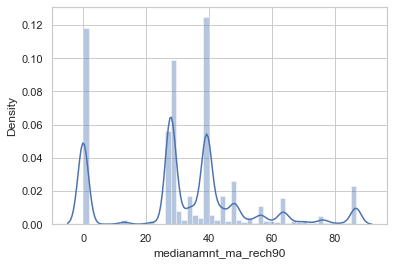

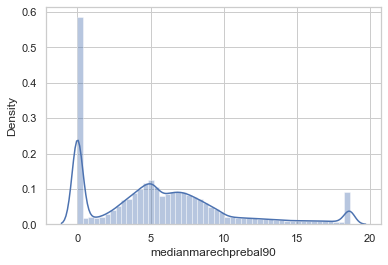

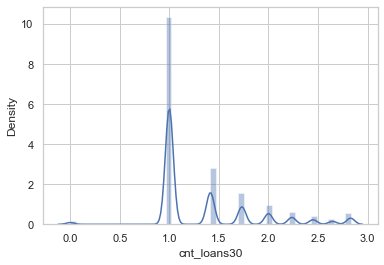

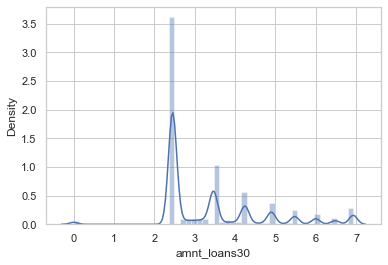

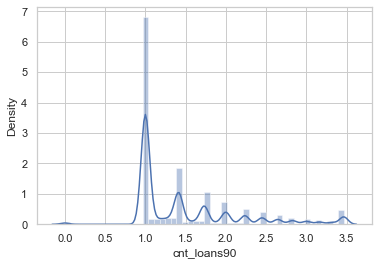

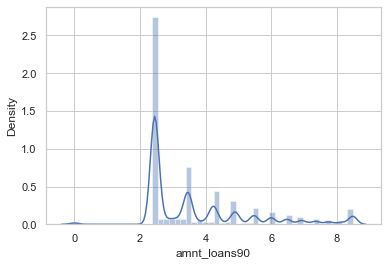

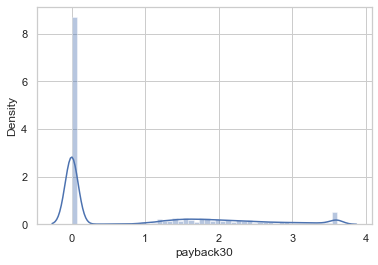

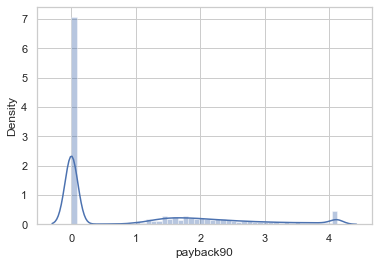

In [62]:
for i in x_Cols:
    sns.distplot(np.sqrt(x_over[i]))
    plt.show()

As these columns have multiplr skew ,will run the model without removing the skewness.

#### MODEL 

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=43)

LG=LogisticRegression()
DTC=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=3)
svc=SVC(kernel='poly')
GB=GaussianNB()

In [64]:

    LG.fit(x_train,y_train)
    LG.score(x_train,y_train)
    pred=LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(LG,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 0.7403574446433276
confusion matrix [[41544 13443]
 [15133 39939]]
classification report               precision    recall  f1-score   support

           0       0.73      0.76      0.74     54987
           1       0.75      0.73      0.74     55072

    accuracy                           0.74    110059
   macro avg       0.74      0.74      0.74    110059
weighted avg       0.74      0.74      0.74    110059



cross validation score
cross val score [0.87583196 0.87647606 0.87690546 0.87692638 0.8774035 ]
cross val score mean: 0.8767086730593867
Best score: -0.13635122841605907




In [65]:
    DTC.fit(x_train,y_train)
    DTC.score(x_train,y_train)
    pred=DTC.predict(x_test)
    print('The model is:',DTC)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(DTC,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: DecisionTreeClassifier()
Accuracy score: 0.8938569312823123
confusion matrix [[49475  5512]
 [ 6170 48902]]
classification report               precision    recall  f1-score   support

           0       0.89      0.90      0.89     54987
           1       0.90      0.89      0.89     55072

    accuracy                           0.89    110059
   macro avg       0.89      0.89      0.89    110059
weighted avg       0.89      0.89      0.89    110059



cross validation score
cross val score [0.86376106 0.86359407 0.8617572  0.8646882  0.86344768]
cross val score mean: 0.8634496440081316
Best score: 0.030407287274180628




In [66]:
    GB.fit(x_train,y_train)
    GB.score(x_train,y_train)
    pred=GB.predict(x_test)
    print('The model is:',GB)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(GB,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: GaussianNB()
Accuracy score: 0.73985771268138
confusion matrix [[47803  7184]
 [21447 33625]]
classification report               precision    recall  f1-score   support

           0       0.69      0.87      0.77     54987
           1       0.82      0.61      0.70     55072

    accuracy                           0.74    110059
   macro avg       0.76      0.74      0.74    110059
weighted avg       0.76      0.74      0.74    110059



cross validation score
cross val score [0.64204776 0.64097426 0.6428827  0.64638103 0.64370915]
cross val score mean: 0.6431989794135169
Best score: 0.09665873326786312




#### After running above models we can see that DecisioTreeClassifier model is resulting to best accuracy score of 89.5%

#### Ensembling

In [67]:
rf=RandomForestClassifier(n_estimators=100)

In [68]:

    rf.fit(x_train,y_train)
    rf.score(x_train,y_train)
    pred=rf.predict(x_test)
    print('The model is:',rf)
    print('Accuracy score:',accuracy_score(y_test,pred))
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('classification report',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(rf,x,y,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean())
    print('Best score:',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: RandomForestClassifier()
Accuracy score: 0.9376516232202727
confusion matrix [[51109  3878]
 [ 2984 52088]]
classification report               precision    recall  f1-score   support

           0       0.94      0.93      0.94     54987
           1       0.93      0.95      0.94     55072

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059



cross validation score
cross val score [0.91175839 0.91092345 0.91216394 0.91249583 0.91106446]
cross val score mean: 0.9116812116714824
Best score: 0.025970411548790318




#### HYPER PARAMETER TUNNING

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params = { 'criterion': ['gini','entropy'],'max_depth': [2,3,5,10,20],'min_samples_leaf':[5,10,20,50]}

In [71]:
grid_search=GridSearchCV(estimator=DTC,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50]},
             scoring='accuracy', verbose=1)

In [72]:
grid_search.best_score_

0.8912785230924626

In [73]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20}

#### After Hyper Tunning the model Decision Tree classifer we come to know the model is running best at criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 20} parameter and best score we get is 88.9%

### AUC ROC CURVE FOR DTC

In [76]:
y_pred_prob=DTC.predict_proba(x_test)[:,-1]

In [77]:
y_pred_prob

array([0., 0., 0., ..., 1., 0., 0.])

In [78]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [79]:
fpr

array([0.        , 0.10016913, 0.10024188, 0.10049648, 0.10076927,
       0.10098751, 0.10111481, 0.10135123, 0.10140579, 0.10166039,
       0.10189681, 0.1020423 , 0.10222416, 0.10231509, 0.10255151,
       0.10264244, 0.1028243 , 0.10295161, 0.10331533, 0.10342445,
       0.10355175, 0.1041337 , 0.10444287, 0.10484296, 0.1050612 ,
       0.10640697, 0.10691618, 0.10717079, 0.10755269, 0.10777093,
       0.10806191, 0.108462  , 1.        ])

In [80]:
tpr

array([0.        , 0.88792853, 0.88796485, 0.88807379, 0.88807379,
       0.88807379, 0.88807379, 0.88807379, 0.88807379, 0.88807379,
       0.88807379, 0.88809195, 0.88809195, 0.88809195, 0.88809195,
       0.88809195, 0.88809195, 0.88811011, 0.88811011, 0.88812827,
       0.88812827, 0.88812827, 0.88812827, 0.88814643, 0.88814643,
       0.88818274, 0.88818274, 0.88818274, 0.88818274, 0.88818274,
       0.88818274, 0.8882009 , 1.        ])

In [81]:
thresholds

array([2.        , 1.        , 0.66666667, 0.5       , 0.33333333,
       0.25      , 0.2       , 0.16666667, 0.14285714, 0.11111111,
       0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857,
       0.06666667, 0.0625    , 0.05882353, 0.05555556, 0.04761905,
       0.04545455, 0.03846154, 0.03571429, 0.03333333, 0.03125   ,
       0.03076923, 0.02777778, 0.02702703, 0.02631579, 0.02325581,
       0.02      , 0.01886792, 0.        ])

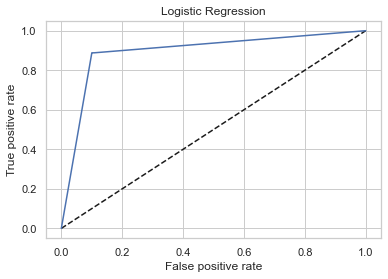

In [82]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [85]:
auc_score=roc_auc_score(y_test,DTC.predict(x_test))

In [86]:
print(auc_score)

0.8938614853337001


### AUC ROC CURVE FOR RF

In [87]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [88]:
auc_score

0.9376453125939324

#### AUC_Score is better for RandomForestClassifier hence will consider Random Forest Classifier as final model.

auc_score= 93.7%

Best accuracy score = 91.1%

#### JOBLIB

In [90]:
joblib.dump(rf,'MCL.obj')

['MCL.obj']